# Project Title :Customer Churn Analytics:

# Abstract
Customer churn in the telecom industry refers to the phenomenon where customers discontinue their service with a company. This is a critical issue as it directly impacts revenue and market share. Understanding the reasons behind churn and predicting which customers are likely to leave can help companies take proactive measures to retain them. Various factors contribute to churn, including service quality, pricing, customer service, and competition. By leveraging data analytics and machine learning techniques, telecom companies can identify patterns and predictors of churn. This enables them to implement targeted strategies such as personalized offers, improved customer support, and loyalty programs to enhance customer satisfaction and retention.

# Problem Statement:
The objective of this project is to analyze customer churn in a telecom company. Customer churn refers to the phenomenon where customers switch from one service provider to another or cancel their subscription altogether. By analyzing customer chum patterns, we aim to identify the factors that contribute to churn and develop strategies to mitigate it.

# Project Description

The goal of this project is to predict customer churn in the telecom industry. Customer churn refers to the loss of clients or subscribers who stop doing business with a service provider. Predicting churn is crucial for telecom companies as it helps them take preemptive actions to retain customers, thus minimizing revenue loss.

# Objectives:
1. Data Collection and Preparation: Gather and preprocess data from various sources, including customer demographics, service usage patterns, billing information, and customer service interactions.

2. Class Imbalance Handling: Address class imbalance in the dataset, where the number of customers who churn is significantly lower than those who do not, using techniques like Synthetic Minority Over-sampling Technique (SMOTE).

3. Feature Engineering: Create new features and select the most relevant ones to improve the predictive power of the model.

4. Model Building: Develop and train a machine learning model, specifically a Random Forest classifier, to predict customer churn.

5. Model Evaluation and Tuning: Evaluate the model’s performance using metrics such as accuracy, precision, recall, and F1-score. Address overfitting issues through techniques such as cross-validation and hyperparameter tuning.

6. Implementation and Deployment: Deploy the model to a production environment, integrating it with a system that can automatically provide retention recommendations for high-risk customers.

7. Monitoring and Maintenance: Continuously monitor the model’s performance and update it as necessary to ensure its effectiveness over time.

# Expected Outcomes:
1. Churn Prediction: Accurately predict which customers are likely to churn.
2. Customer Retention Strategies: Develop actionable insights and strategies to retain high-risk customers.
3. Business Impact: Reduce churn rates and enhance customer satisfaction and loyalty, ultimately improving the company's bottom line.

# Algorithms:
LogisticRegression,DecisionTreeClassifier,RandomForestClassifer,AddaboostClassifier,GradientBoostClassifer

# About Data
Data is divided into 3 Types

# Type-1:Demographic information:

• Gender: Whether the customer is a male or a female.

• SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

• Partner: Whether the customer has a partner or not (Yes, No)

• Dependents : Whether the customer has dependents or not (Yes, No)

# Type-2:Customer Acconting Information:

• Contract: The contract term of the customer (Month-to-month, One year, Two year)

• PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

• MonthlyCharges: The amount charged to the customer monthly

• TotalCharges: The total amount charged to the customer

• Tenure: Number of months the customer has stayed with the company

• PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (au card (automatic))

• CustomeriD: Customer ID

# Type-3:Service information

• PhoneService: Whether the customer has a phone service or not (yes, No)

• MultipleLines: Whether the customer has multiple lines or not (yes, No, No phone service)

• InternetService: Customer's internet service provider (DSL, Fiber optic, No)

• OnlineSecurity: Whether the customer has online security or not (yes, No, No internet service)

• OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

• DeviceProtection: Whether the customer has device protection or not (yes, No, No internet service)

• TechSupport: Whether the customer has tech support or not (yes, No, No internet service)

• Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)

• StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

# Traget variable
• Churn: Whether the customer churn or not (yes or No)*

# 1. Data Preparation - (EDA & Feature Engineering - Data Analytics )

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data
ds = pd.read_excel(r"C:\Users\velda\Documents\ML\Customer_Churn\Telco-Customer-Churn.xlsx")
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Gives rows and columns of the dataaset
ds.shape

(7043, 21)

In [4]:
# Gives Colmns of the dataset
ds.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
# Checking the data types of all the columns
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Check the descriptive statistics of numeric variables
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Showing how many are churned
ds['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
# In Percentage
100*ds['Churn'].value_counts()/len(ds['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

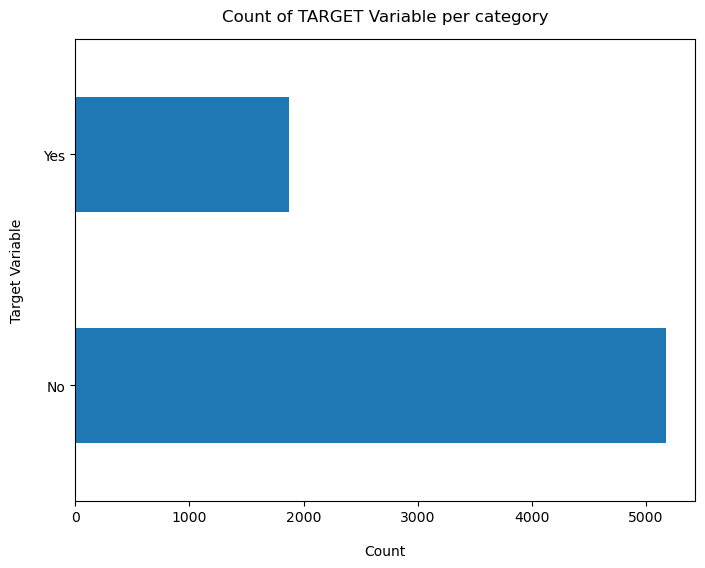

In [9]:
# Plotting the Churn Data 
ds['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [10]:
ds.isnull().sum()
# Here it is showing 0 Null Values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### We can't see any null values in the dataset. isnull() is used to identify only the nan values only it doesn't detect the blankspaces...


In [11]:
a=ds[ds['TotalCharges']==' '].value_counts().sum()
a

11

In [12]:
ds['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [13]:
ds.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
ds['TotalCharges'].replace(" ",np.nan,inplace=True)
# So we are Replacing blanckSpace with the (nan).....So we can see the null values in dataset...

In [15]:
ds['MonthlyCharges'].replace(" ",np.nan,inplace=True)
# So we are Replacing blanckSpace with the (nan).....So we can see the null values in dataset...

In [16]:
ds['tenure'].replace(" ",np.nan,inplace=True)
# So we are Replacing blanckSpace with the (nan).....So we can see the null values in dataset...

In [17]:
ds.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Removing customerID & SeniorCitizen Columns
    Because they are unwanted for the datsest in my case...

In [18]:
ds.drop(['customerID','SeniorCitizen'],axis=1,inplace=True)
ds
# Check The Columns Deleted are not

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


### If TotalCharges has Datatype Object change to Float....For that use this Command ds['TotalCharges']=ds['TotalCharges'].astype(float) 

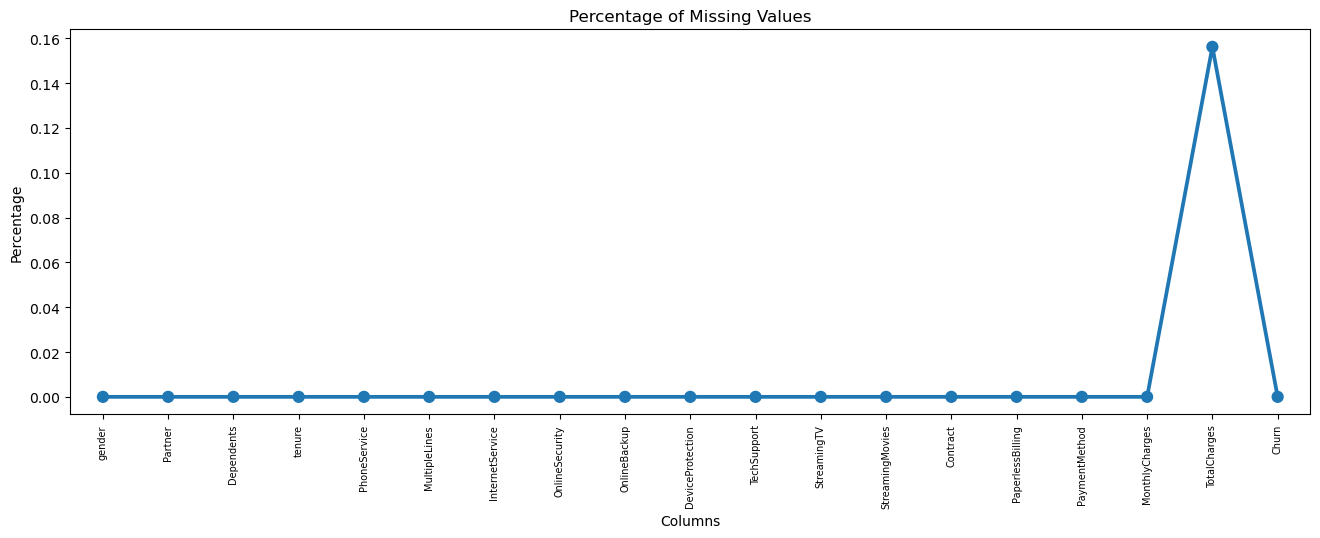

In [20]:
# Plotting the Missing Data
missing = pd.DataFrame((ds.isnull().sum())*100/ds.shape[0]).reset_index()
missing.columns = ['index', 'percentage']  # Rename columns for clarity
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

### Removing Null values...

In [21]:
ds['TotalCharges'].fillna(ds['TotalCharges'].mean(),inplace=True)

In [22]:
ds.isnull().sum()

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

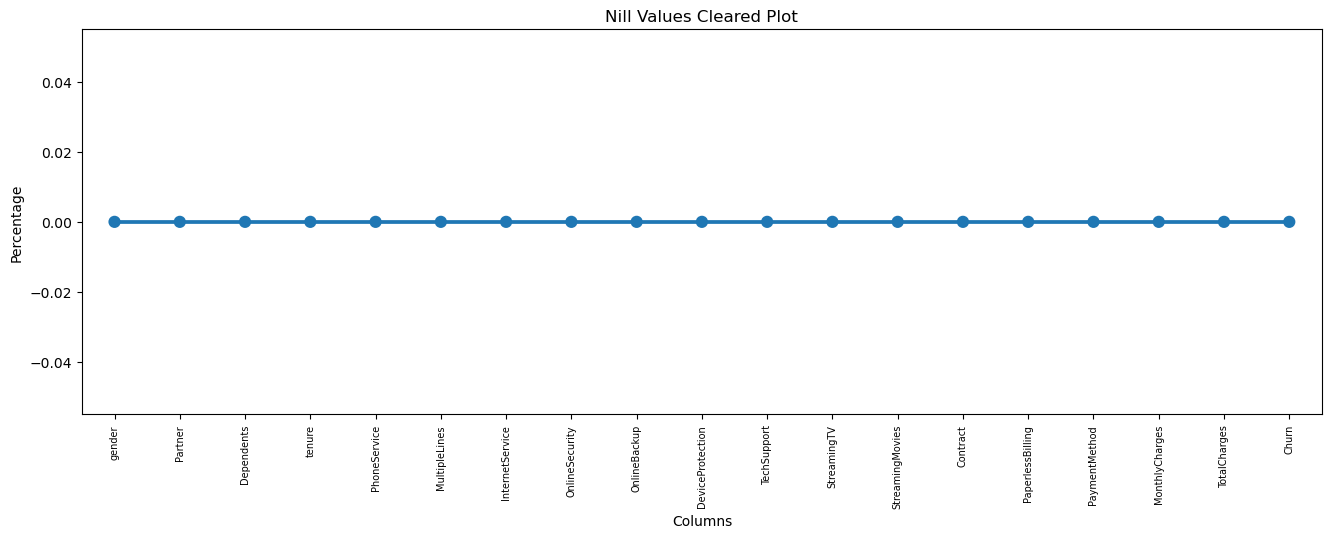

In [23]:
# Null Values Cleared Plot
missing = pd.DataFrame((ds.isnull().sum())*100/ds.shape[0]).reset_index()
missing.columns = ['index', 'percentage']  # Rename columns for clarity
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Nill Values Cleared Plot")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

## Mapping the attribute names

In [24]:
ds['Partner'] = ds['Partner'].map({'No': 'partner no', 'Yes': 'partner yes'})

ds['Dependents'] = ds['Dependents'].map({'No': 'Dependents no', 'Yes': 'Dependents yes'})

ds['PhoneService'] = ds['PhoneService'].map({'No': 'PhoneService no', 'Yes': 'PhoneService yes'})

ds['MultipleLines'] = ds['MultipleLines'].map({'No': 'MultipleLines no', 'Yes': 'MultipleLines yes'})

ds['OnlineSecurity'] = ds['OnlineSecurity'].map({'No': 'OnlineSecurity no', 'Yes': 'OnlineSecurity yes'})

ds['OnlineBackup'] = ds['OnlineBackup'].map({'No': 'OnlineBackup no', 'Yes': 'OnlineBackup yes'})

ds['DeviceProtection'] = ds['DeviceProtection'].map({'No': 'DeviceProtection no', 'Yes': 'DeviceProtection yes'})

ds['TechSupport'] = ds['TechSupport'].map({'No': 'TechSupport no', 'Yes': 'TechSupport yes'})

ds['StreamingTV'] = ds['StreamingTV'].map({'No': 'StreamingTV no', 'Yes': 'StreamingTV yes'})

ds['StreamingMovies'] = ds['StreamingMovies'].map({'No': 'StreamingMovies no', 'Yes': 'StreamingMovies yes'})

ds['PaperlessBilling'] = ds['PaperlessBilling'].map({'No': 'PaperlessBilling no', 'Yes': 'PaperlessBilling yes'})

ds['Churn'] = ds['Churn'].map({'No': 'Churn no', 'Yes': 'Churn yes'})

In [25]:
# Seperating Categorical and Numerical Columns
categorical=ds.select_dtypes(object)
Numeric = ds.select_dtypes(include=['int64', 'float64'])

In [26]:
# Converting 'No internet service' to 'No', 'No phone service' to 'No'
for col in categorical:
    ds[col] = ds[col].replace({'No internet service': 'No', 'No phone service': 'No'})
for i in categorical:
    print(i)
    print(ds[i].unique())
    print(ds[i].nunique())
    print()

gender
['Female' 'Male']
2

Partner
['partner yes' 'partner no']
2

Dependents
['Dependents no' 'Dependents yes']
2

PhoneService
['PhoneService no' 'PhoneService yes']
2

MultipleLines
[nan 'MultipleLines no' 'MultipleLines yes']
2

InternetService
['DSL' 'Fiber optic' 'No']
3

OnlineSecurity
['OnlineSecurity no' 'OnlineSecurity yes' nan]
2

OnlineBackup
['OnlineBackup yes' 'OnlineBackup no' nan]
2

DeviceProtection
['DeviceProtection no' 'DeviceProtection yes' nan]
2

TechSupport
['TechSupport no' 'TechSupport yes' nan]
2

StreamingTV
['StreamingTV no' 'StreamingTV yes' nan]
2

StreamingMovies
['StreamingMovies no' 'StreamingMovies yes' nan]
2

Contract
['Month-to-month' 'One year' 'Two year']
3

PaperlessBilling
['PaperlessBilling yes' 'PaperlessBilling no']
2

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4

Churn
['Churn no' 'Churn yes']
2



In [27]:
# Convering Categorical Data to 1's and 0's by Using LabelEncoder...But there are differny types like OneHot Encoding,Dummy Variables....
from sklearn.preprocessing import LabelEncoder
categorical= pd.DataFrame(categorical)
Label_encoded=categorical.apply(LabelEncoder().fit_transform)
Label_encoded

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,2,0,0,1,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,2,0,1,0,1,1,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,0,1,0,1,1,1,1,1,1,3,0
7039,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
7040,0,1,1,0,2,0,1,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3,1


In [28]:
# concatenate the Categorical Data and Numerical Data
new=pd.concat([Numeric,Label_encoded],axis=1)
new

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0,1,0,0,2,0,0,1,0,0,0,0,0,1,2,0
1,34,56.95,1889.50,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,2,53.85,108.15,1,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,45,42.30,1840.75,1,0,0,0,2,0,1,0,1,1,0,0,1,0,0,0
4,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,1,1,1,1,0,1,0,1,1,1,1,1,1,3,0
7039,72,103.20,7362.90,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
7040,11,29.60,346.45,0,1,1,0,2,0,1,0,0,0,0,0,0,1,2,0
7041,4,74.40,306.60,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3,1


In [29]:
# Assuming 'new' is your DataFrame that you want to save
new.to_excel(r"C:\Users\velda\Documents\ML\Customer_Churn\new_data.xlsx", index=False)

# Univarient Analysis

## Used Stacked bar chart
1. A stacked bar chart is a type of bar chart that represents different groups on top of one another. 
2. Each bar in the chart represents a total, and the segments within each bar represent the breakdown of that total into different categories. 
3. This allows for the comparison of totals across categories while also showing the composition of each total.

<Figure size 1200x600 with 0 Axes>

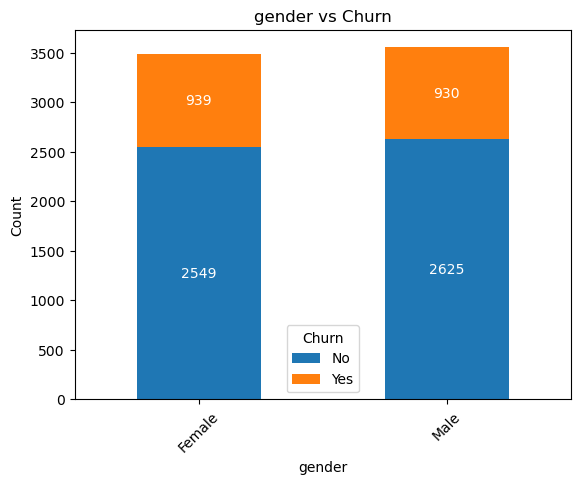

<Figure size 1200x600 with 0 Axes>

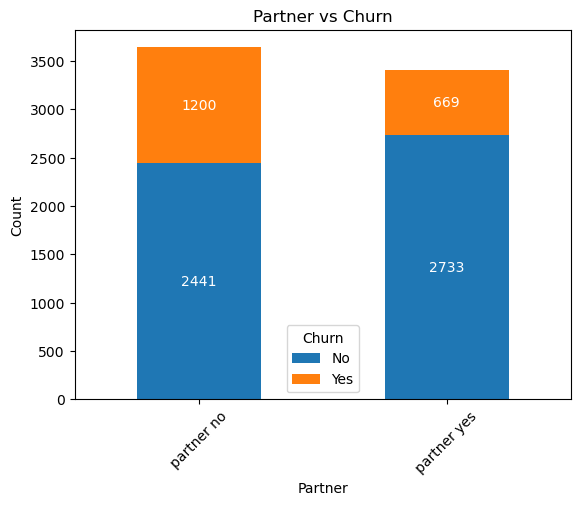

<Figure size 1200x600 with 0 Axes>

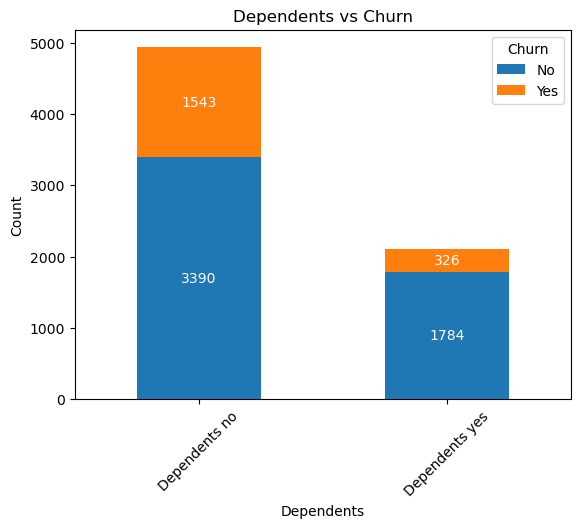

<Figure size 1200x600 with 0 Axes>

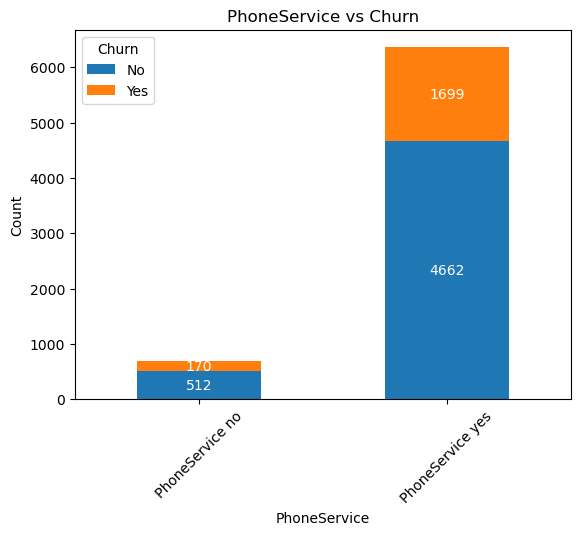

<Figure size 1200x600 with 0 Axes>

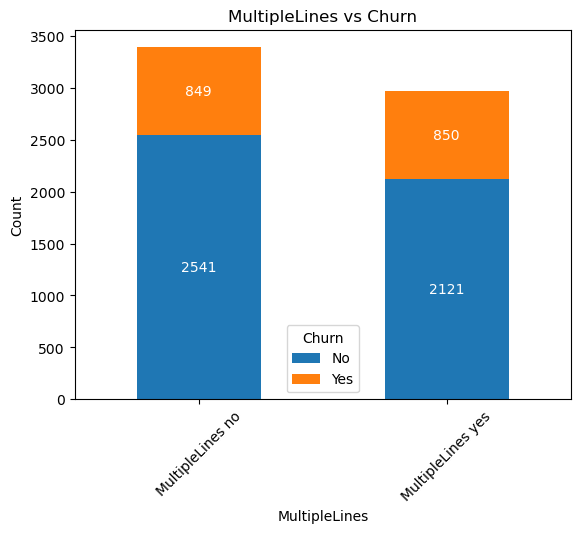

<Figure size 1200x600 with 0 Axes>

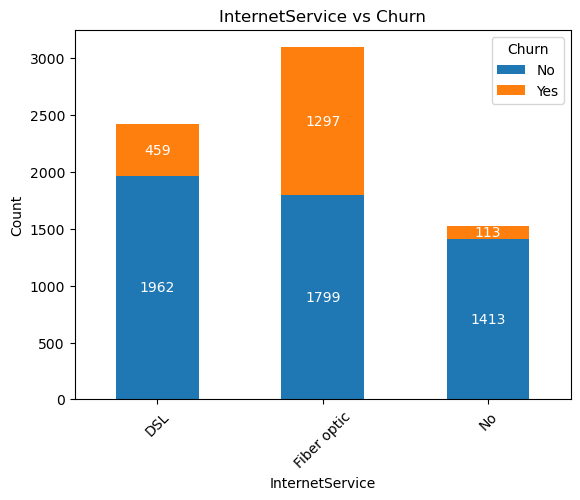

<Figure size 1200x600 with 0 Axes>

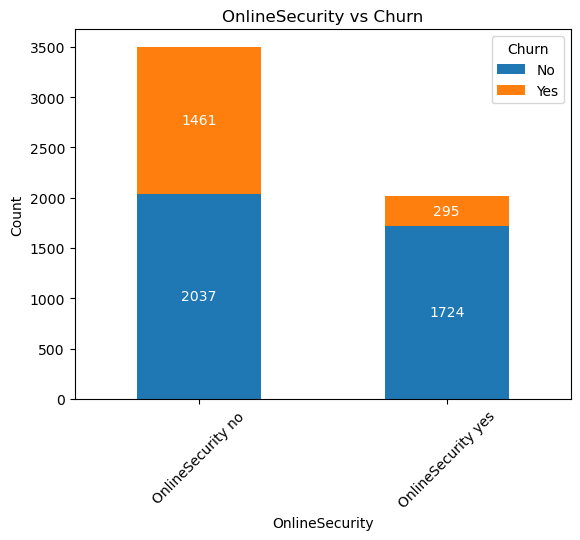

<Figure size 1200x600 with 0 Axes>

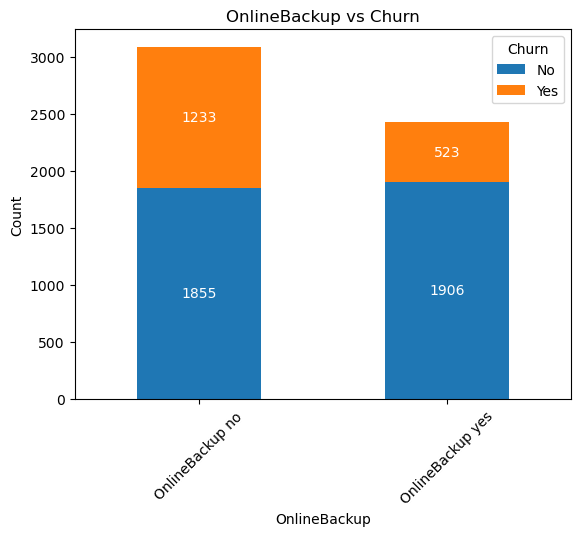

<Figure size 1200x600 with 0 Axes>

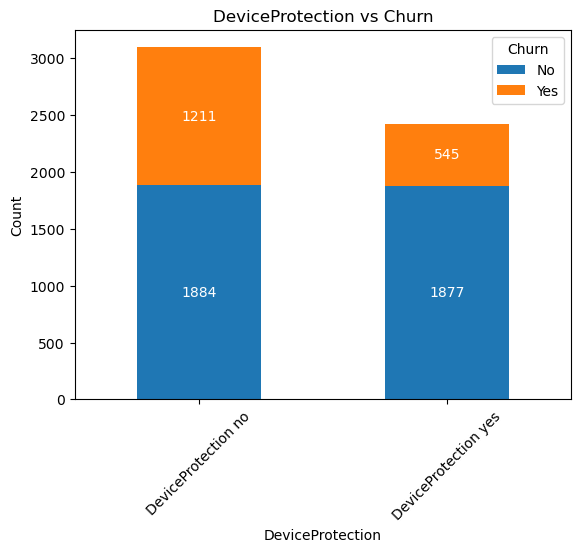

<Figure size 1200x600 with 0 Axes>

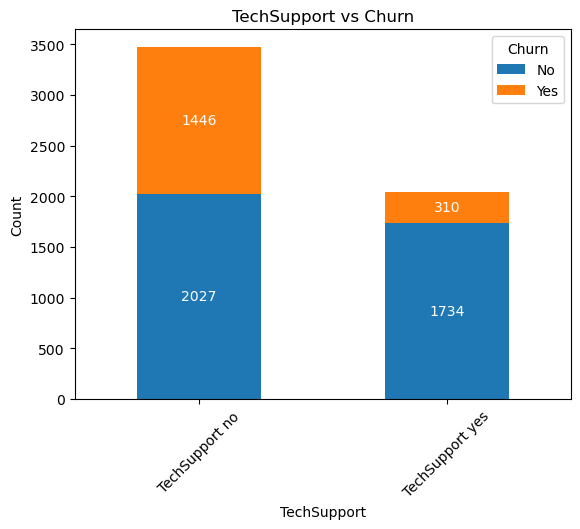

<Figure size 1200x600 with 0 Axes>

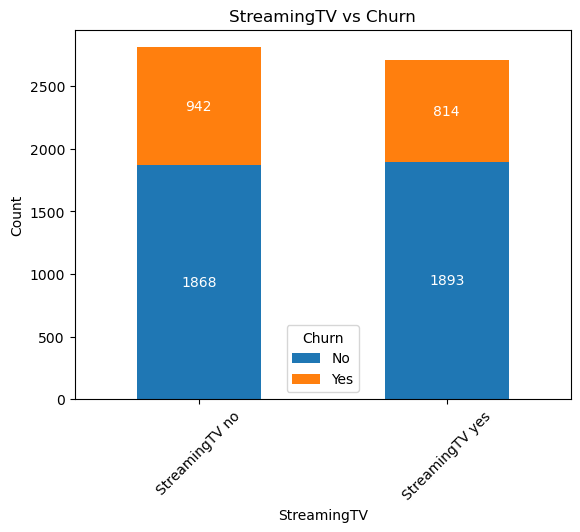

<Figure size 1200x600 with 0 Axes>

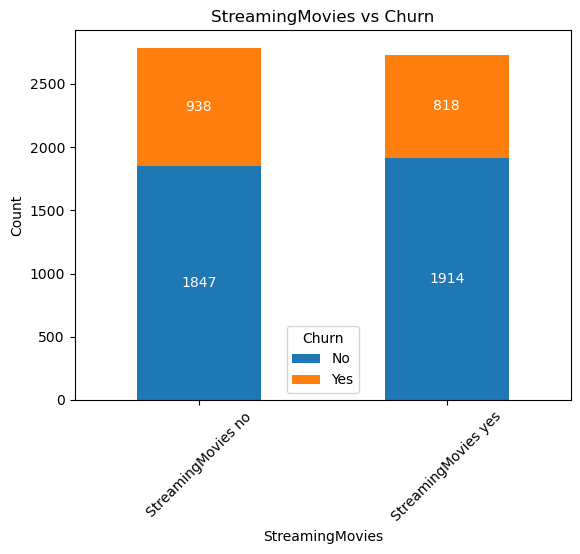

<Figure size 1200x600 with 0 Axes>

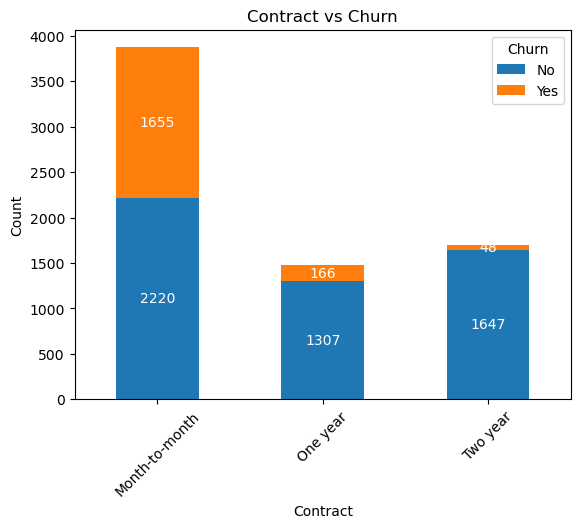

<Figure size 1200x600 with 0 Axes>

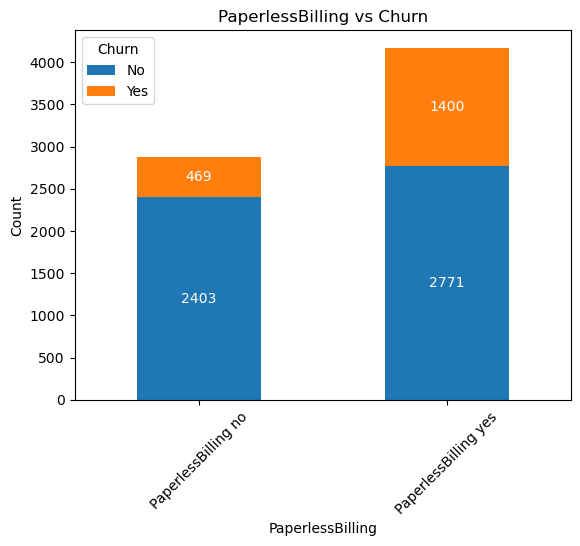

<Figure size 1200x600 with 0 Axes>

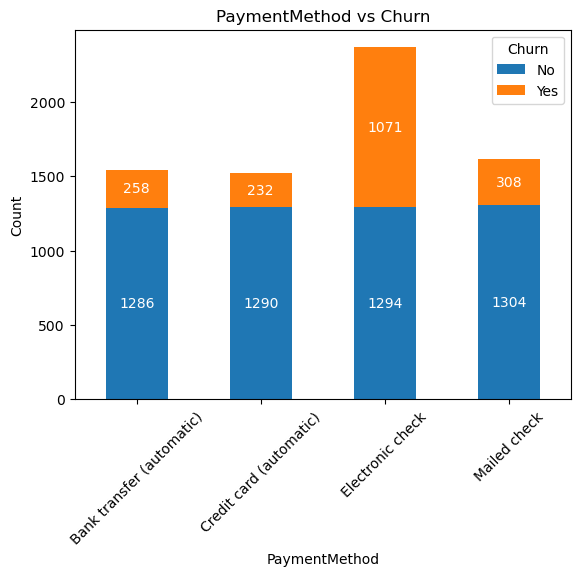

In [30]:
# Exclude 'Churn' from predictors
predictors = ds.drop(columns=['Churn','tenure','MonthlyCharges','TotalCharges']).columns
for i, predictor in enumerate(predictors):
    plt.figure(i, figsize=(12, 6))
    count_data = ds.groupby([predictor, 'Churn']).size().unstack(fill_value=0)
    ax = count_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'{predictor} vs Churn')
    plt.ylabel('Count')
    plt.xlabel(predictor)
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    
    # Add counts on top of the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
    
    plt.show()

In [31]:
# Univariate analysis for Numeric Data
numeric_features = ds[['TotalCharges', 'MonthlyCharges', 'tenure']]

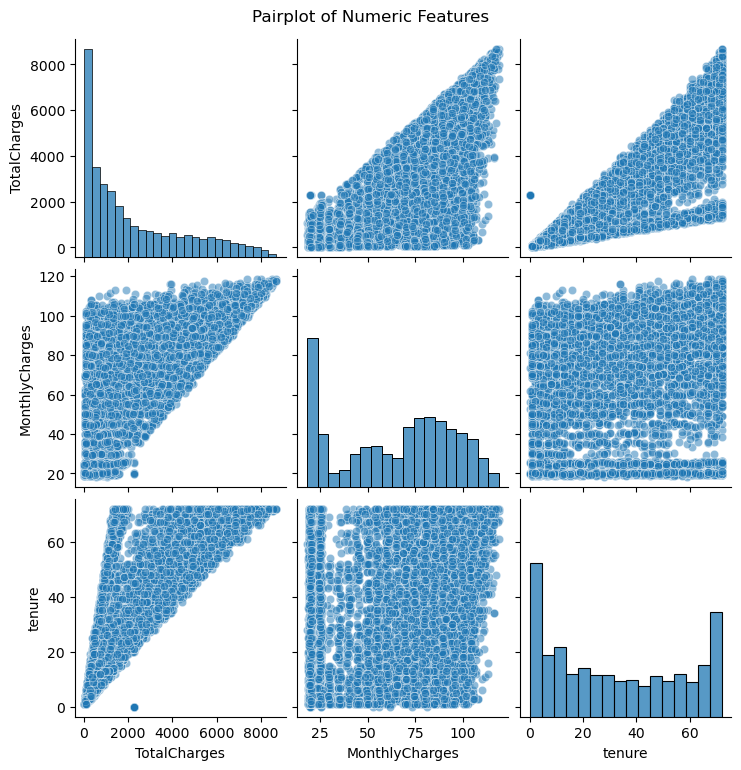

In [32]:
# Creating pairplot with colors
sns.pairplot(numeric_features, diag_kind='hist', plot_kws={'alpha': 0.5}, palette='Set1')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

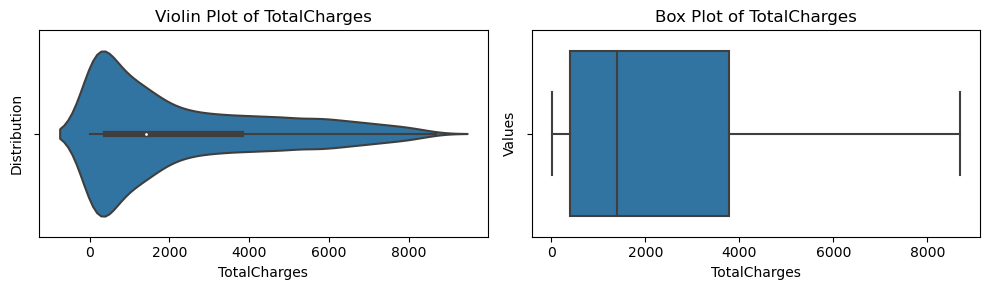

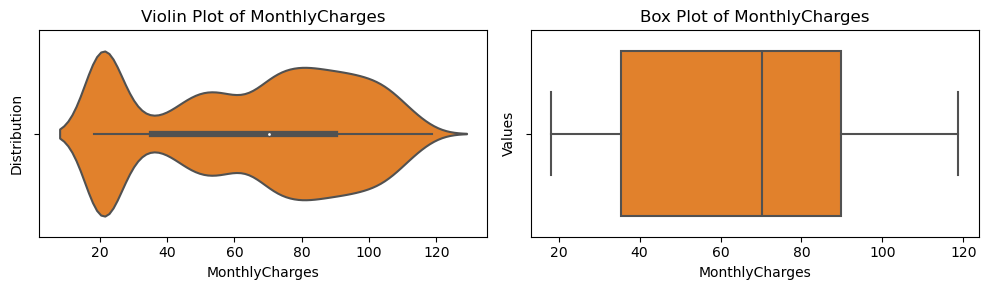

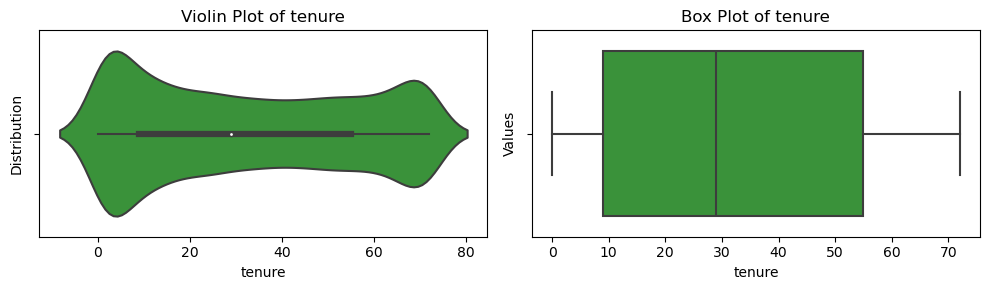

In [33]:
# Custom colors for plots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, feature in enumerate(numeric_features):
    plt.figure(figsize=(10, 3))
    
    # Violin plot
    plt.subplot(1, 2, 1)  # subplot 1
    sns.violinplot(data=Numeric, x=feature, palette=[colors[i]])
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Distribution')
    
    # Box plot
    plt.subplot(1, 2, 2)  # subplot 2
    sns.boxplot(data=Numeric, x=feature, color=colors[i])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Values')
    
    plt.tight_layout()  # Ensure plots do not overlap
    plt.show()

#           BIVARENT ANALYSIS
                
### Bivariate analysis for numerical variables

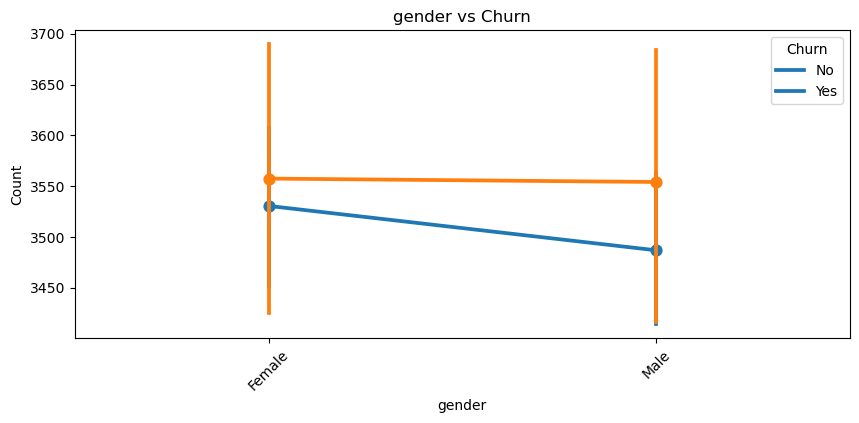

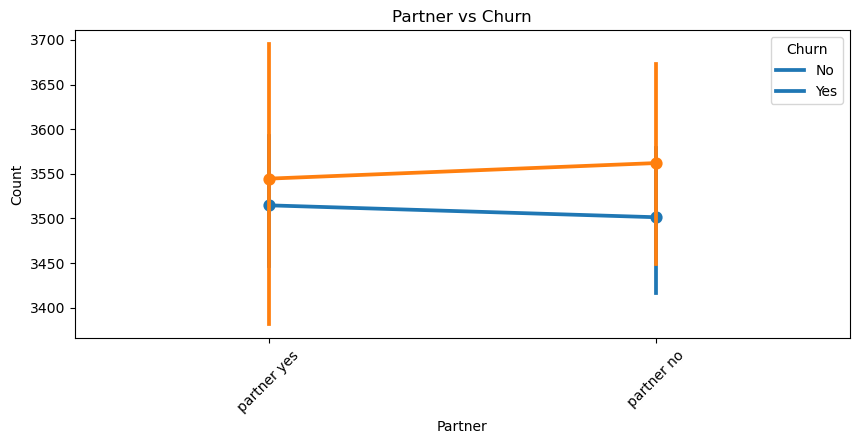

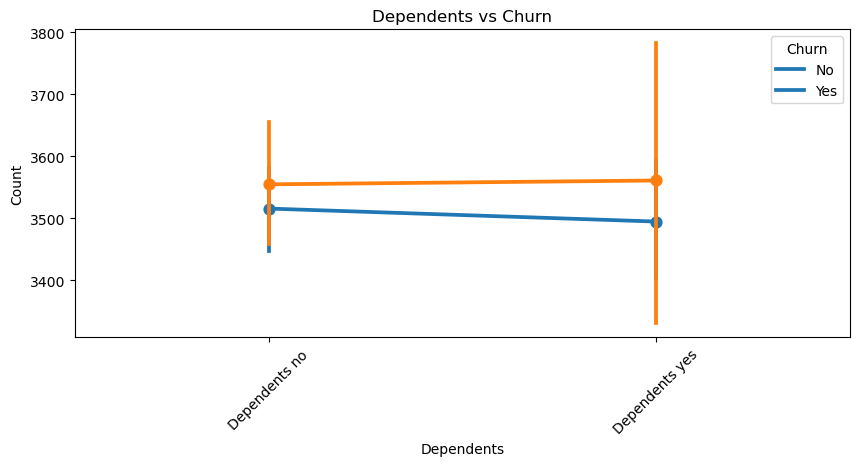

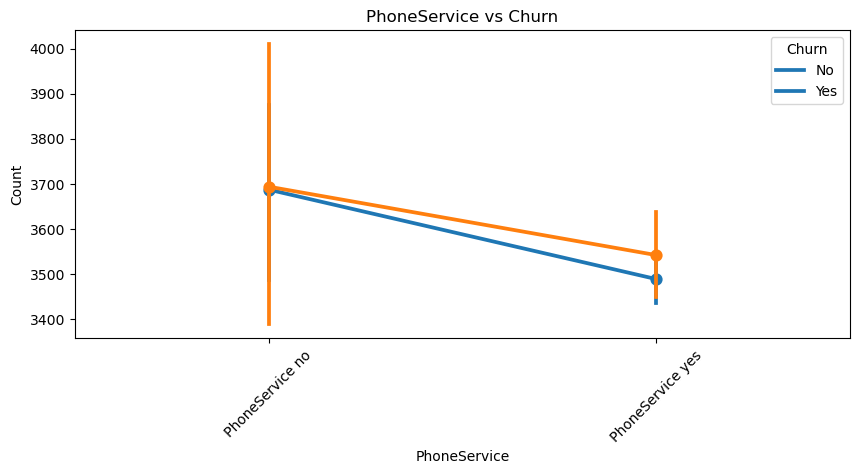

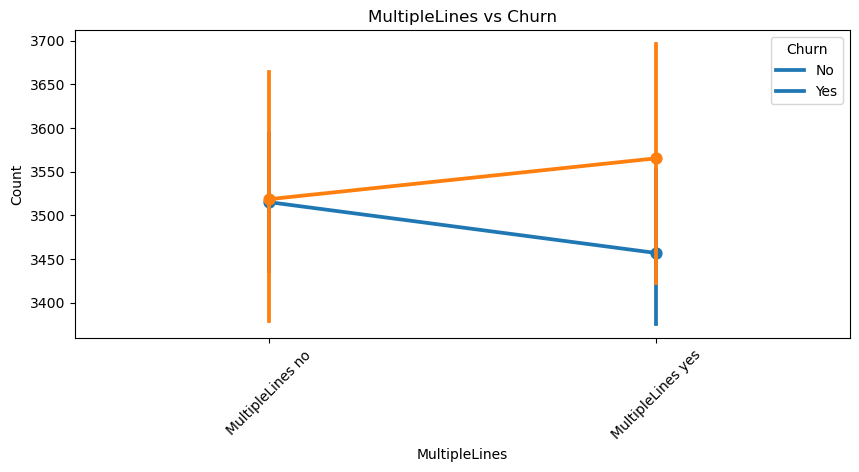

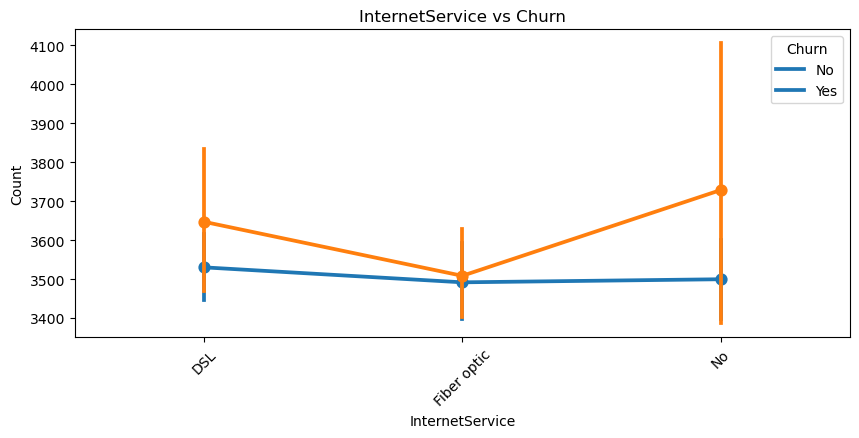

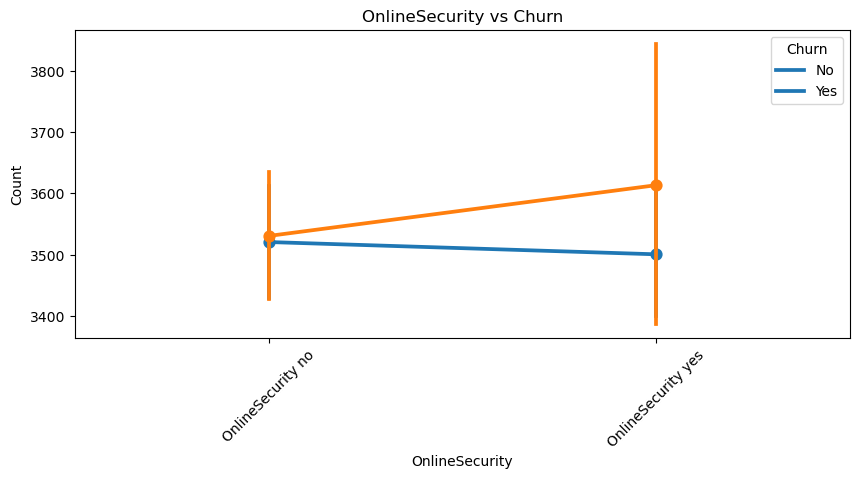

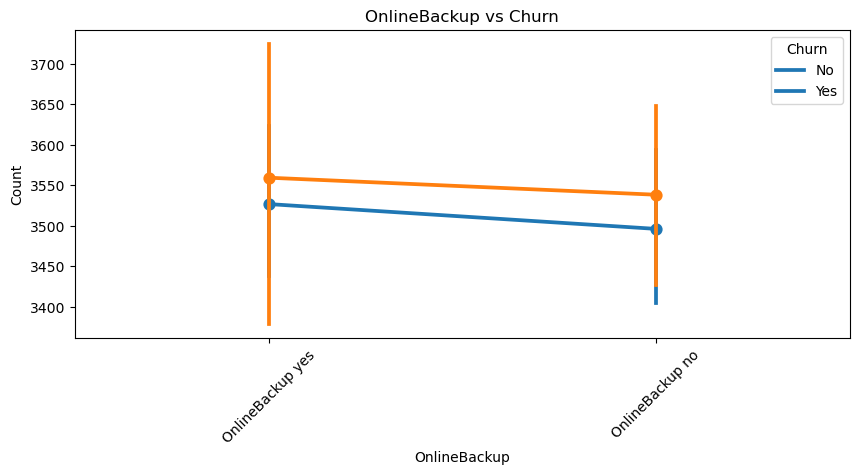

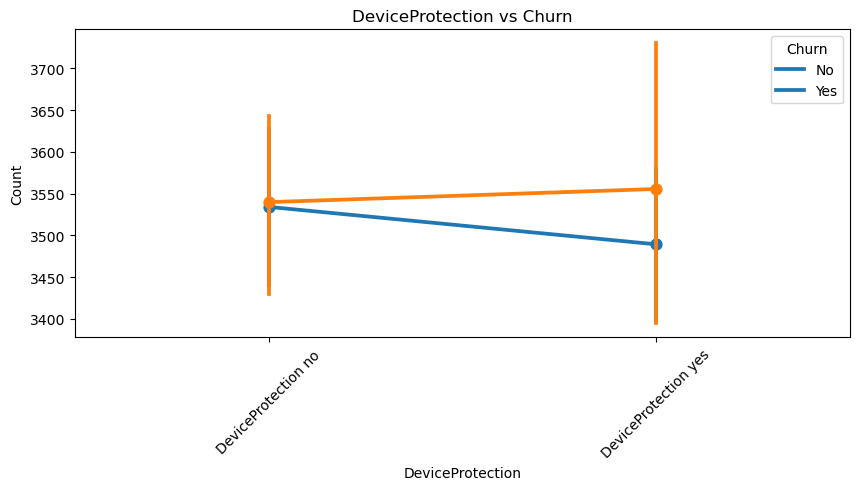

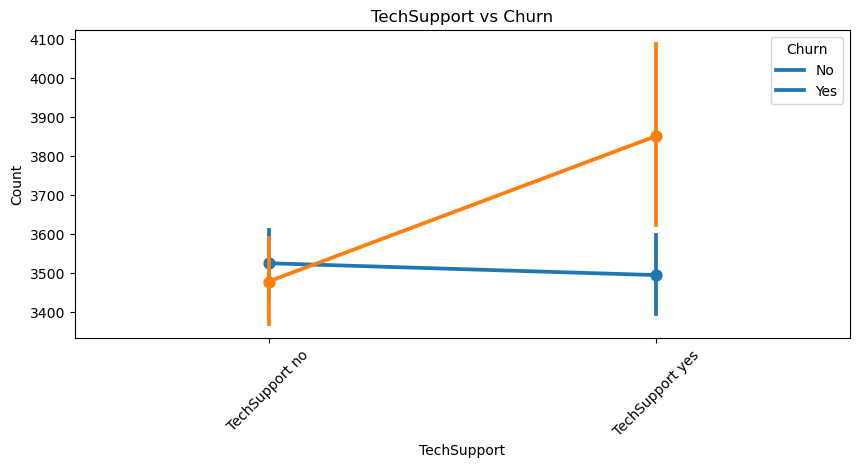

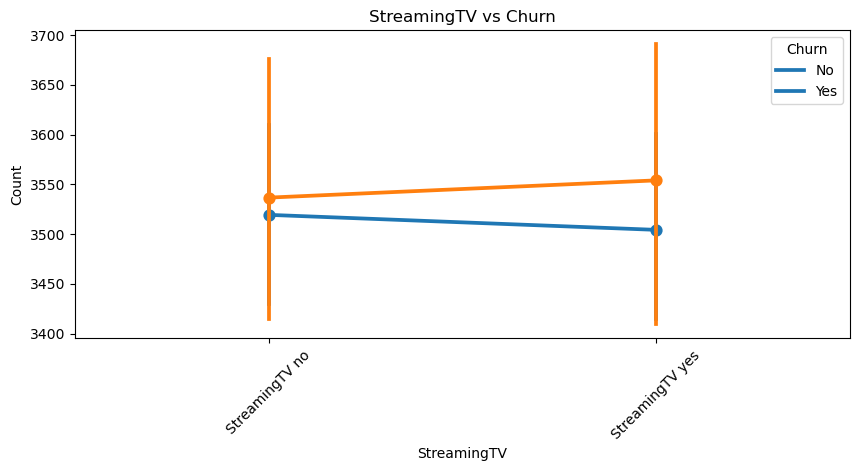

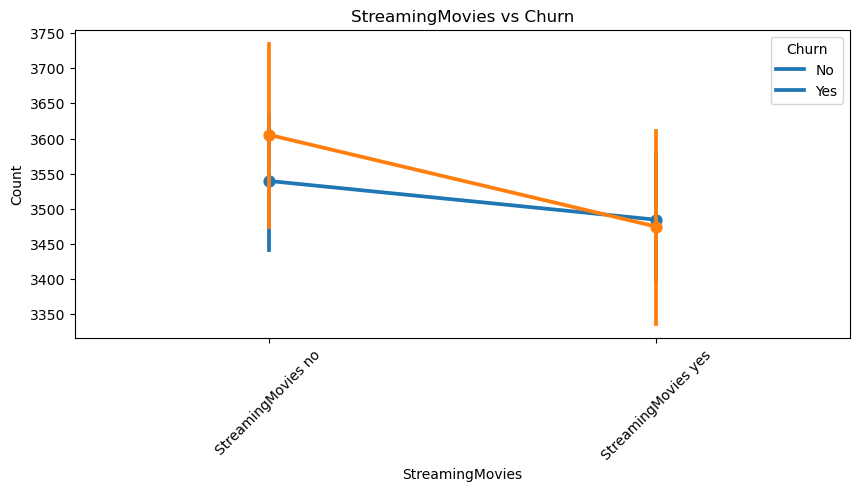

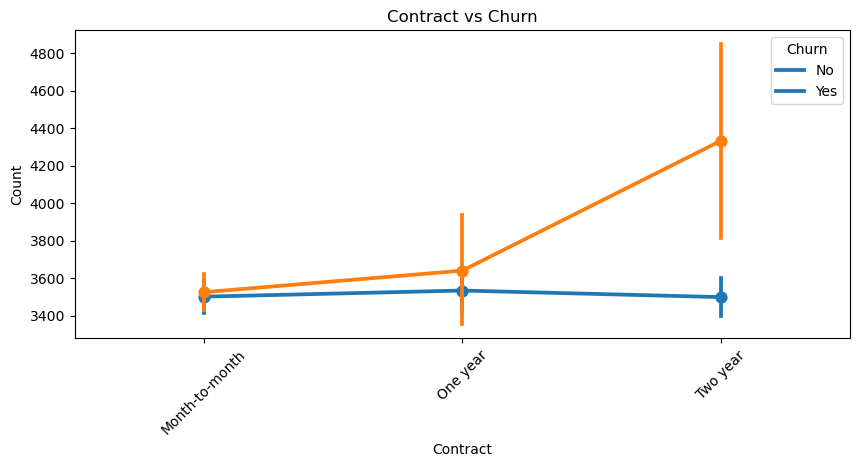

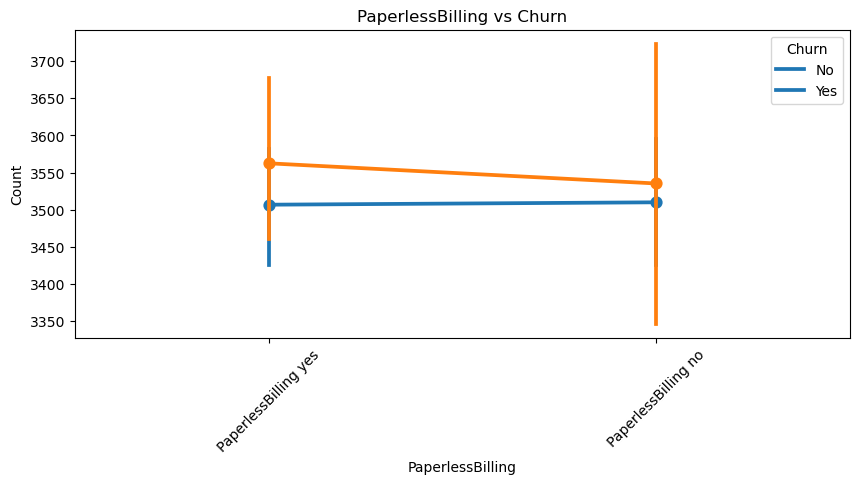

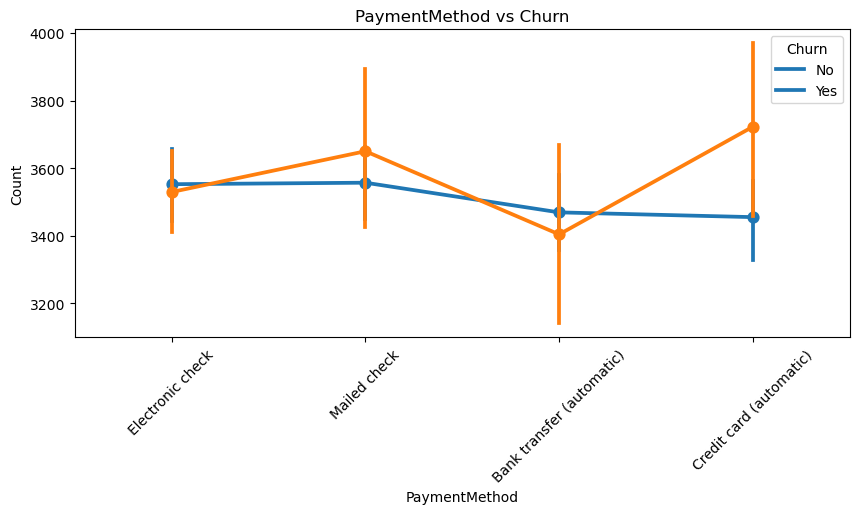

In [34]:
# Exclude 'Churn' and other numeric features from predictors
categorical_features = ds.drop(columns=['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'], errors='ignore').select_dtypes(include=['object', 'category']).columns

for i, predictor in enumerate(categorical_features):
    plt.figure(i, figsize=(10, 4))
    sns.pointplot(x=predictor, y=ds.index, hue='Churn', data=ds, palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'{predictor} vs Churn')
    plt.ylabel('Count')
    plt.xlabel(predictor)
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()


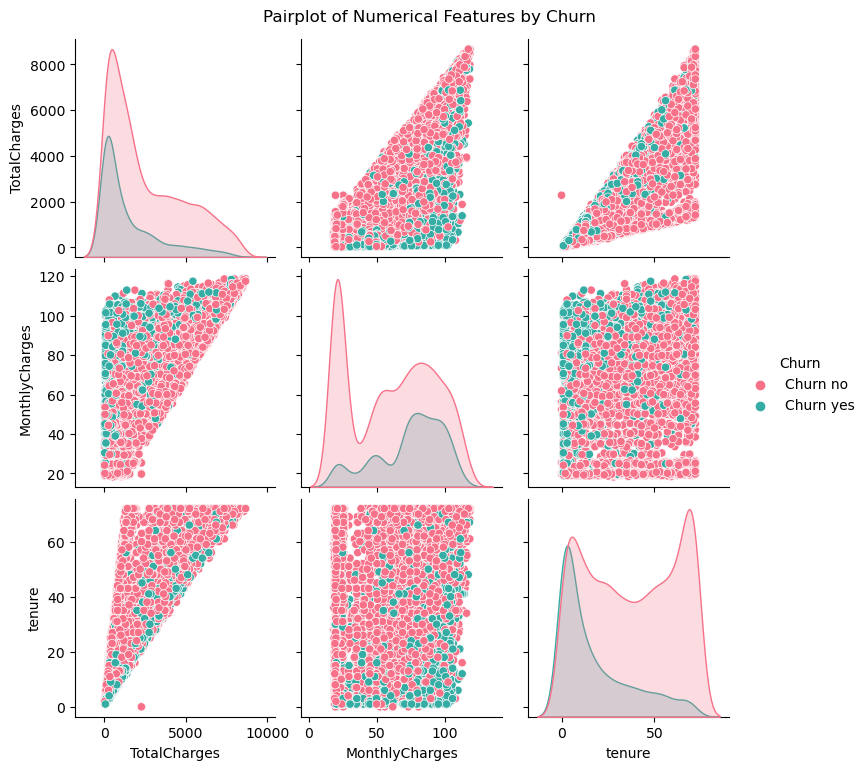

In [35]:
# Example scatter plot matrix with hue
sns.pairplot(ds, hue='Churn', vars=numeric_features, palette='husl')
plt.suptitle('Pairplot of Numerical Features by Churn', y=1.02)
plt.show()

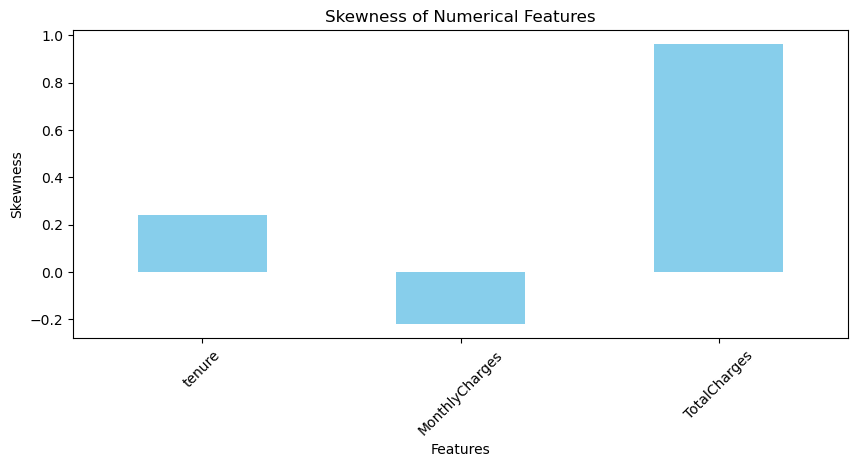

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64


In [36]:
# Calculate skewness
skewness = Numeric.skew()

# Plot skewness
plt.figure(figsize=(10, 4))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

# Print skewness
print(skewness)

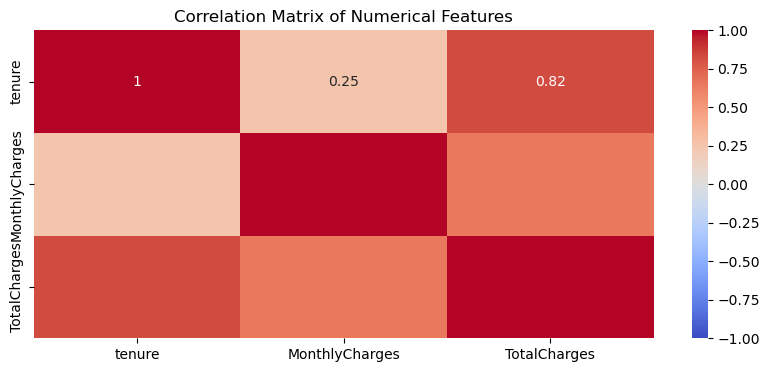

In [37]:
# Calculating correlation matrix
correlation_matrix = Numeric.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

 # ----------------------EDA PART COMPLETED--------------------

# 2. Training the Data

In [38]:
X = new.drop(columns=['Churn'])
y = new['Churn']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# ImBalanced Data

In [40]:
#ImBalanced
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## 1. Logistic Regression

### Description:
Logistic Regression is a linear model used for binary classification problems. It models the probability of a binary outcome based on one or more predictor variables. The logistic function is used to map predicted values to probabilities.

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_Regression=LogisticRegression(random_state=10)
logistic_Regression.fit(X_train,y_train)
y_pred=logistic_Regression.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=logistic_Regression.score(X_train, y_train)
print('bias:',bias)

varience=logistic_Regression.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1376  163]
 [ 244  330]]
ac: 0.807382867960246
bias: 0.7973630831643002
varience: 0.807382867960246
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1539
           1       0.67      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



## 2. DecisionTreeClassifier

### Description:
A Decision Tree is a non-linear model that splits the data into subsets based on the value of input features. It creates a tree-like model of decisions and their possible consequences. Decision Trees are easy to interpret and can handle both numerical and categorical data.

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=dtree.score(X_train, y_train)
print('bias:',bias)

varience=dtree.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1256  283]
 [ 279  295]]
ac: 0.7340274491244676
bias: 0.9975659229208925
varience: 0.7340274491244676
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1539
           1       0.51      0.51      0.51       574

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.73      0.73      0.73      2113



## 3. KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=knn.score(X_train, y_train)
print('bias:',bias)

varience=knn.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1365  174]
 [ 312  262]]
ac: 0.7699952673923331
bias: 0.8304259634888438
varience: 0.7699952673923331
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1539
           1       0.60      0.46      0.52       574

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



## 4. Naive_bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
navie=GaussianNB()
navie.fit(X_train,y_train)
y_pred=navie.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=navie.score(X_train, y_train)
print('bias:',bias)

varience=navie.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1014  525]
 [  91  483]]
ac: 0.7084713677236157
bias: 0.7056795131845842
varience: 0.7084713677236157
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1539
           1       0.48      0.84      0.61       574

    accuracy                           0.71      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.80      0.71      0.72      2113



## 5. Support Vector Machine

In [45]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=svc.score(X_train, y_train)
print('bias:',bias)

varience=svc.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1539    0]
 [ 574    0]]
ac: 0.7283483199242783
bias: 0.7373225152129818
varience: 0.7283483199242783
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1539
           1       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



## 6. MLPClassifier

In [46]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train,y_train)
y_pred=nn.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=nn.score(X_train, y_train)
print('bias:',bias)

varience=nn.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[917 622]
 [ 99 475]]
ac: 0.6587789872219593
bias: 0.6486815415821501
varience: 0.6587789872219593
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      1539
           1       0.43      0.83      0.57       574

    accuracy                           0.66      2113
   macro avg       0.67      0.71      0.64      2113
weighted avg       0.78      0.66      0.68      2113



## 7. GradientBoostingClassifier

### Description:
Gradient Boosting is an ensemble technique that builds multiple weak learners (usually decision trees) sequentially. Each tree corrects the errors of the previous one, resulting in a strong predictive model. It is known for its high performance and accuracy.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=gb.score(X_train, y_train)
print('bias:',bias)

varience=gb.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1392  147]
 [ 285  289]]
ac: 0.795551348793185
bias: 0.8263691683569979
varience: 0.795551348793185
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.66      0.50      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.79      2113



## 8.AdaBoostClassifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
y_pred=adaboost.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=adaboost.score(X_train, y_train)
print('bias:',bias)

varience=adaboost.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1389  150]
 [ 279  295]]
ac: 0.7969711310932324
bias: 0.8077079107505071
varience: 0.7969711310932324
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.66      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



## 9. RandomForestClassifier

### Description:
Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting. It creates a forest of random trees, each trained on a bootstrap sample of the data.

In [49]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)
y_pred=random.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=random.score(X_train, y_train)
print('bias:',bias)

varience=random.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1397  142]
 [ 305  269]]
ac: 0.7884524372929484
bias: 0.9975659229208925
varience: 0.7884524372929484
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.65      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



## 10. XGBClassifier

### Description:
XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosting designed for speed and performance. It includes regularization to prevent overfitting and handles missing data automatically.

In [50]:
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=xg.score(X_train, y_train)
print('bias:',bias)

varience=xg.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1372  167]
 [ 271  303]]
ac: 0.7927117841930904
bias: 0.9401622718052738
varience: 0.7927117841930904
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.64      0.53      0.58       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



## Evaluation

### Model Performance Metrics
The performance of each trained model is evaluated using metrics such as accuracy, precision, recall, F1-score, and confusion matrix. These metrics provide insights into the model's performance on the testing set and its generalizability.

## Cross-Validation Scores
Cross-validation is performed to ensure the model's stability and reliability. Both regular and stratified cross-validation scores are calculated to evaluate the model's performance across different subsets of the data.

# Balanced Data

In [51]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
print(y_res.value_counts())

Churn
0    5174
1    5174
Name: count, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res , test_size=0.30, random_state=42)

# 1.Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
logistic_Regression=LogisticRegression(random_state=10)
logistic_Regression.fit(X_train,y_train)
y_pred=logistic_Regression.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=logistic_Regression.score(X_train, y_train)
print('bias:',bias)

varience=logistic_Regression.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1152  422]
 [ 205 1326]]
ac: 0.7980676328502415
bias: 0.7937318790556399
varience: 0.7980676328502415
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1574
           1       0.76      0.87      0.81      1531

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



## 2.DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=dtree.score(X_train, y_train)
print('bias:',bias)

varience=dtree.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1247  327]
 [ 325 1206]]
ac: 0.7900161030595814
bias: 0.998619356620185
varience: 0.7900161030595814
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1574
           1       0.79      0.79      0.79      1531

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



## 3.KNeighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=knn.score(X_train, y_train)
print('bias:',bias)

varience=knn.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1134  440]
 [ 280 1251]]
ac: 0.7681159420289855
bias: 0.8401214966174237
varience: 0.7681159420289855
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1574
           1       0.74      0.82      0.78      1531

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



# 4. Naive_bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
navie=GaussianNB()
navie.fit(X_train,y_train)
y_pred=navie.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=navie.score(X_train, y_train)
print('bias:',bias)

varience=navie.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1080  494]
 [ 209 1322]]
ac: 0.7735909822866345
bias: 0.765566754107414
varience: 0.7735909822866345
              precision    recall  f1-score   support

           0       0.84      0.69      0.75      1574
           1       0.73      0.86      0.79      1531

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105



# 5. Support Vector Machine

In [57]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=svc.score(X_train, y_train)
print('bias:',bias)

varience=svc.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1146  428]
 [ 675  856]]
ac: 0.6447665056360709
bias: 0.6444843296976391
varience: 0.6447665056360709
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1574
           1       0.67      0.56      0.61      1531

    accuracy                           0.64      3105
   macro avg       0.65      0.64      0.64      3105
weighted avg       0.65      0.64      0.64      3105



# 6. MLPClassifier

In [58]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train,y_train)
y_pred=nn.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=nn.score(X_train, y_train)
print('bias:',bias)

varience=nn.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1312  262]
 [ 373 1158]]
ac: 0.7954911433172303
bias: 0.7916609139859174
varience: 0.7954911433172303
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1574
           1       0.82      0.76      0.78      1531

    accuracy                           0.80      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.80      0.80      3105



# 7. GradientBoostingClassifier 

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=gb.score(X_train, y_train)
print('bias:',bias)

varience=gb.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1258  316]
 [ 192 1339]]
ac: 0.8363929146537842
bias: 0.8438492337429242
varience: 0.8363929146537842
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1574
           1       0.81      0.87      0.84      1531

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



# 8.AdaBoostClassifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
y_pred=adaboost.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=adaboost.score(X_train, y_train)
print('bias:',bias)

varience=adaboost.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1207  367]
 [ 176 1355]]
ac: 0.8251207729468599
bias: 0.8254866767913848
varience: 0.8251207729468599
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1574
           1       0.79      0.89      0.83      1531

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.82      3105
weighted avg       0.83      0.83      0.82      3105



# 9. RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)
y_pred=random.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=random.score(X_train, y_train)
print('bias:',bias)

varience=random.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1322  252]
 [ 236 1295]]
ac: 0.8428341384863124
bias: 0.998619356620185
varience: 0.8428341384863124
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1574
           1       0.84      0.85      0.84      1531

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



# 10. XGBClassifier

In [62]:
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=xg.score(X_train, y_train)
print('bias:',bias)

varience=xg.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cm: [[1313  261]
 [ 221 1310]]
ac: 0.8447665056360708
bias: 0.9562336048598647
varience: 0.8447665056360708
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1574
           1       0.83      0.86      0.84      1531

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.85      0.84      0.84      3105



## RandomForestClassifier & XGBClassifier has OverFitting...So I am doing HyperParameter Tunning...Using GridSearchCv

## Hyperparameter tuning

---->>> Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its     performance. Here’s a simplified explanation:

What are Hyperparameters?

Hyperparameters are settings that control the learning process and structure of a machine learning algorithm. They are set before the learning process begins and remain constant during training.

Why Tune Hyperparameters?

1. Performance Improvement: Proper tuning can significantly improve a model's predictive accuracy and generalizability.
2. Avoid Overfitting: Tuning helps prevent the model from fitting too closely to the training data (overfitting) or too loosely (underfitting).


-------------------- Common Hyperparameters to Tune:------------------
1. Learning Rate (for gradient-based algorithms): Controls how much to change the model in response to the estimated error each time the model weights are updated.

2. Number of Trees (for ensemble methods like Random Forest): Specifies how many decision trees to include in the model.

3. Regularization Parameters: Control the complexity of the model to prevent overfitting.

4. Kernel Choice and Kernel Parameters (for SVMs): Define the type of decision boundary and its smoothness.

5. Batch Size and Number of Epochs (for neural networks): Determine how many samples to use in one iteration and how many times the learning algorithm will work through the entire dataset.

--------------------How to Tune Hyperparameters:--------------------
1. Grid Search: Evaluates all combinations of specified hyperparameter values to find the best model.

2. Random Search: Samples hyperparameter values randomly from specified distributions.

3. Bayesian Optimization: Uses probabilistic models to select the most promising hyperparameters based on past evaluations.

--------------------Practical Tips:--------------------
1. Start with Defaults: Begin with default values and adjust based on initial performance.

2. Use Cross-Validation: Validate the model's performance on multiple subsets of the data to ensure robustness.

3. Iterate: Hyperparameter tuning is an iterative process. Evaluate and adjust until satisfactory performance is achieved.

---------------------Conclusion:------------------------

Hyperparameter tuning is crucial for optimizing machine learning models. By adjusting these parameters, practitioners can achieve better performance and more robust models tailored to their specific datasets and tasks

## ROC Curve and Feature Importance
The Receiver Operating Characteristic (ROC) curve is plotted to evaluate the model's ability to distinguish between classes. Feature importance is also analyzed to identify the most influential features in predicting customer churn.

### RandomForestClassifier

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_res, y_res)
best_random = grid_search.best_estimator_
y_pred=best_random.predict(X_test)

y_pred_proba = best_random.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=best_random.score(X_train, y_train)
print('bias:',bias)

varience=best_random.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(best_random, X_res, y_res, cv=15, scoring='accuracy')
print(cv_scores)
cv_mean = cv_scores.mean()
print('Cross-validation Score Mean:', cv_mean)
from sklearn.model_selection import StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_stratified = cross_val_score(best_random, X_res, y_res, cv=stratified_kfold, scoring='accuracy')
print(cv_scores_stratified)
cv_mean_stratified = cv_scores_stratified.mean()
print('Stratified Cross-validation Score Mean:', cv_mean_stratified)

cm: [[1567    7]
 [   2 1529]]
ac: 0.9971014492753624
bias: 0.998067099268259
varience: 0.9971014492753624
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1574
           1       1.00      1.00      1.00      1531

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105

[0.75217391 0.77826087 0.75652174 0.74927536 0.74927536 0.84347826
 0.9        0.88695652 0.87536232 0.9        0.8826087  0.90724638
 0.90144928 0.89840348 0.92162554]
Cross-validation Score Mean: 0.8468425148818913
[0.84637681 0.85120773 0.85120773 0.85217391 0.84637681 0.8647343
 0.83478261 0.84541063 0.83172147 0.85686654]
Stratified Cross-validation Score Mean: 0.8480858539137911


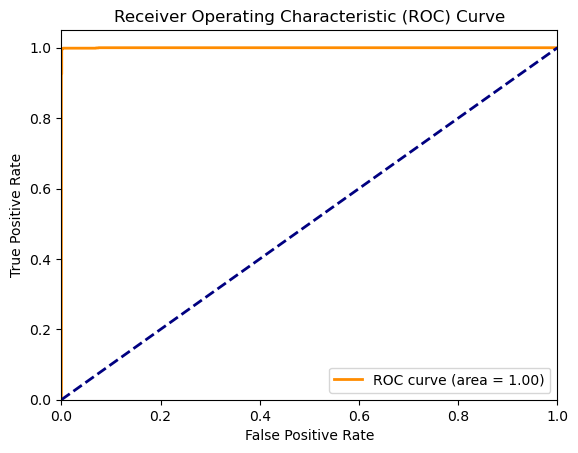

In [65]:
# Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

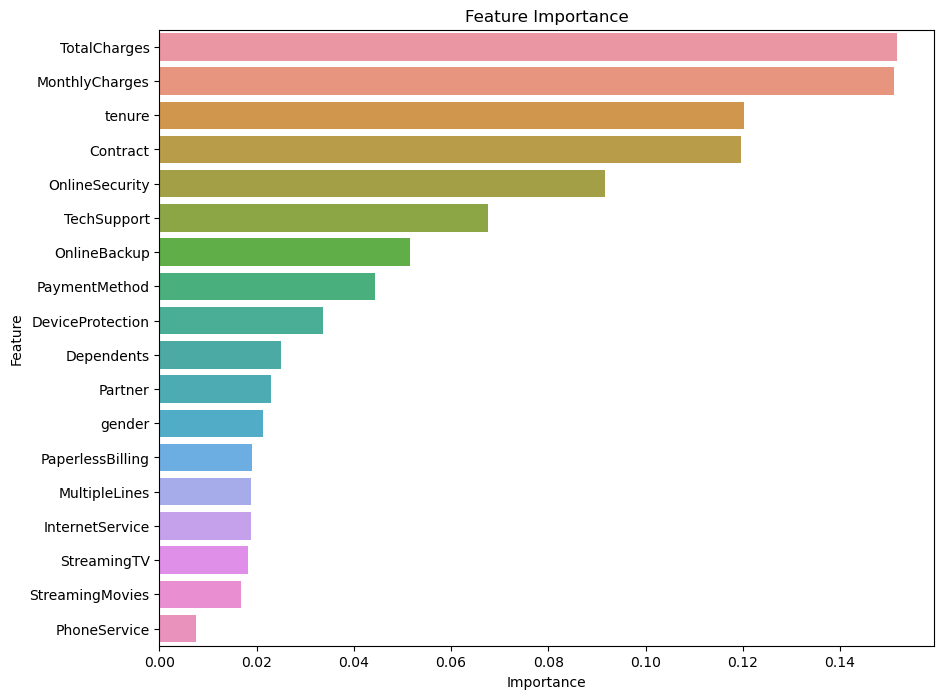

In [66]:
# Feature Importance
importances = best_random.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

## XGBClassifier

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2],
    'reg_alpha': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_res, y_res)
best_xg = grid_search.best_estimator_

y_pred=best_xg.predict(X_test)

y_pred_proba = best_xg.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test, y_pred)
print('cm:',cm)

ac=accuracy_score(y_test, y_pred)
print('ac:',ac)

bias=best_xg.score(X_train, y_train)
print('bias:',bias)

varience=best_xg.score(X_test, y_test)
print('varience:',varience)

print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_xg, X_res, y_res, cv=15, scoring='accuracy')
print(cv_scores)
cv_mean = cv_scores.mean()
print('Cross-validation Score Mean:', cv_mean)

from sklearn.model_selection import StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_stratified = cross_val_score(best_xg, X_res, y_res, cv=stratified_kfold, scoring='accuracy')
print(cv_scores_stratified)
cv_mean_stratified = cv_scores_stratified.mean()
print('Stratified Cross-validation Score Mean:', cv_mean_stratified)

cm: [[1386  188]
 [ 143 1388]]
ac: 0.8933977455716586
bias: 0.894933038796079
varience: 0.8933977455716586
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1574
           1       0.88      0.91      0.89      1531

    accuracy                           0.89      3105
   macro avg       0.89      0.89      0.89      3105
weighted avg       0.89      0.89      0.89      3105

[0.74782609 0.76666667 0.73623188 0.75942029 0.74202899 0.83478261
 0.89855072 0.8942029  0.87246377 0.90434783 0.88115942 0.91884058
 0.8942029  0.90566038 0.91001451]
Cross-validation Score Mean: 0.8444266352551832
[0.85700483 0.85410628 0.84927536 0.85507246 0.84057971 0.85797101
 0.81835749 0.83671498 0.83558994 0.85106383]
Stratified Cross-validation Score Mean: 0.8455735897364018


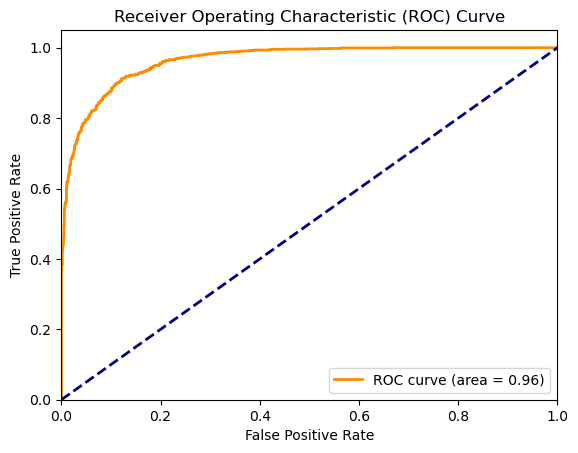

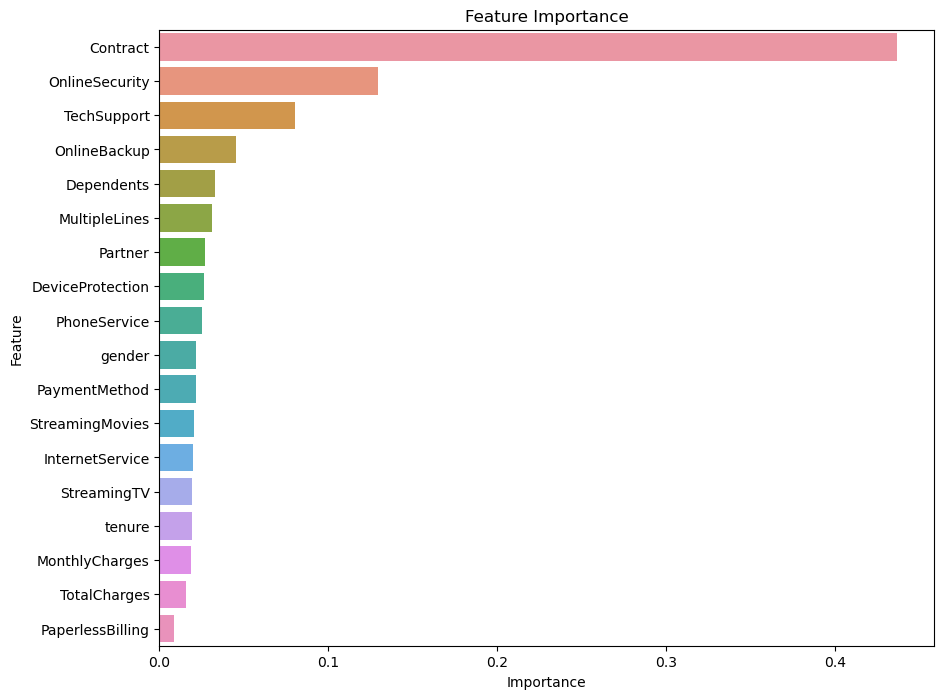

In [69]:
# Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Feature Importance
importances = best_xg.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [70]:
import pickle

# Save the model as a pickle file
with open('best_xg.pkl', 'wb') as file:
    pickle.dump(best_xg, file)

print("Model saved successfully!")

Model saved successfully!


# Conclusion
This document provides a comprehensive analysis of telecom customer churn, covering data preprocessing, exploratory data analysis, model training, hyperparameter tuning, and evaluation. Various algorithms, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost Classifiers, were used to predict customer churn. Their performances were evaluated using various metrics, and the models were saved for future use.